In [26]:
from portfolio_manager import PortfolioManager
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# silence warnings
import warnings
warnings.filterwarnings('ignore')

In [27]:
assets = ["BTC-USD", "DBE", "GOLD.AX", "ARKK"]
portfolio_manager = PortfolioManager(assets)


In [47]:
portfolio_manager.fetch_data(start_date="2019-03-20", end_date="2023-05-20")
portfolio_manager.set_weights([0.20, 0.2, 0.5, 0.10])  # weights for each asset


[*********************100%***********************]  4 of 4 completed


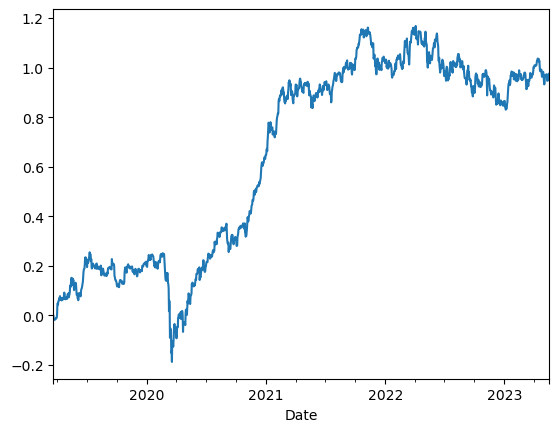

In [48]:
portfolio_manager.plot_data(graph="port_returns")

In [49]:
simp_returns = portfolio_manager.calculate_returns()
log_returns = portfolio_manager.calculate_log_returns()


In [50]:
simp_returns[:"2014-11-05"]

,ARKK,BTC-USD,DBE,GOLD.AX
Date,,,,


In [51]:
import scipy.stats as scs
from empyrical import max_drawdown, calmar_ratio, sortino_ratio, stats, simple_returns, value_at_risk

In [52]:
rets = portfolio_manager.portfolio_returns()

In [53]:
print(rets.sum())
print(stats.annual_return(rets))
print(stats.annual_volatility(rets))
print(stats.max_drawdown(rets))
print(stats.sharpe_ratio(rets))
print(stats.sortino_ratio(rets))

0.9650526541141331
0.14231608006527163
0.23070794171160278
-0.37858246718373384
0.6930423780693249
0.9704566132723803


In [54]:
portfolio_manager.calculate_log_returns()

,ARKK,BTC-USD,DBE,GOLD.AX
Date,,,,
2019-03-21,0.020385,-0.014328,-0.006720,0.000576
2019-03-22,-0.042930,-0.001331,-0.013578,-0.002882
2019-03-26,0.004343,0.005538,0.004073,-0.004978
2019-03-27,-0.010893,0.025270,-0.007481,-0.000402
2019-03-28,0.010677,-0.004404,-0.001366,-0.003679
...,...,...,...,...
2023-05-12,-0.030836,-0.007278,-0.016117,0.000719
2023-05-16,-0.024939,-0.005755,-0.007762,0.000716
2023-05-17,0.025198,0.013306,0.029685,-0.006819


In [55]:
equity = 10000
percs = [0.01, 0.1, 1., 2.5, 5.0, 10.0]
VaR = scs.scoreatpercentile(rets, percs)

In [56]:
print('{}    {}'.format('Confidence Level', 'Daily Value-at-Risk'))
print(33 * '-')
for pair in zip(percs, VaR):
    print('{:16.2f} {:16.3f}{}'.format(100 - pair[0], -pair[1]*100, "%"))

Confidence Level    Daily Value-at-Risk
---------------------------------
           99.99           12.108%
           99.90            9.190%
           99.00            3.748%
           97.50            2.838%
           95.00            2.232%
           90.00            1.474%


<AxesSubplot:xlabel='Date'>

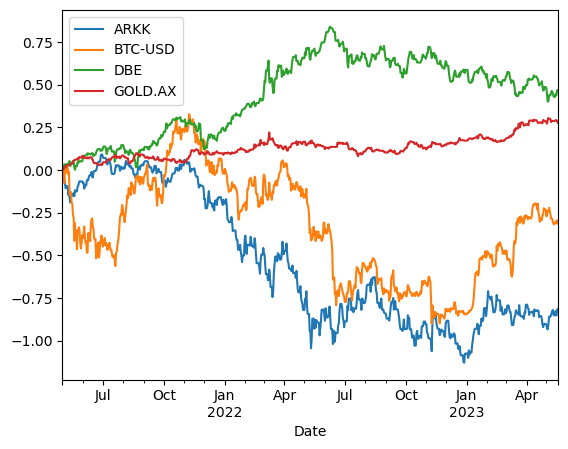

In [57]:
simp_returns["2021-05-01":].cumsum().plot()

### Inflation Regime 
- Gold is stable and slightly positive
- DBE takes off!
- BTC and ARK utterly crushed

<AxesSubplot:xlabel='Date'>

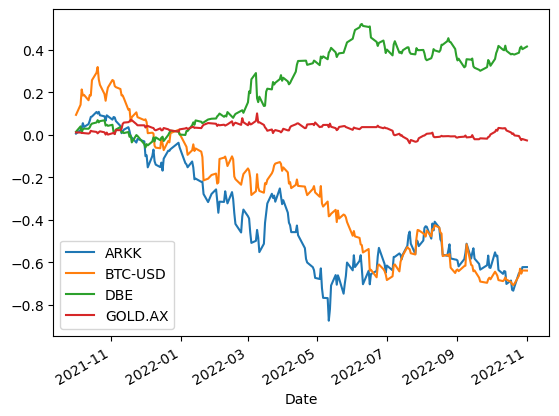

In [58]:
log_returns["2021-10-01":"2022-11-01"].cumsum().plot()

### Deflation Regime
- BTC and ARK dip down before stimulus comes in and pushes it higher
- Gold performs reasonable but not superb due to currency debasement
- DBE utterly crushed

<AxesSubplot:xlabel='Date'>

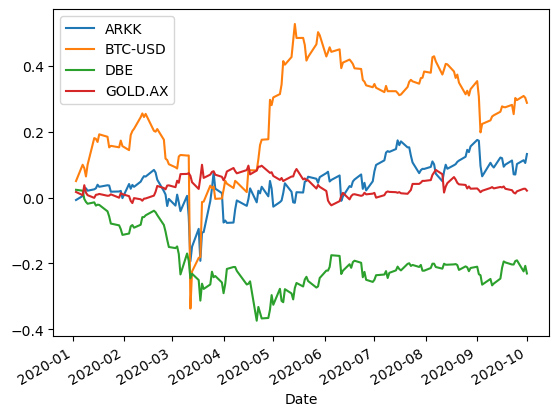

In [59]:
log_returns["2020-01-01":"2020-10-01"].cumsum().plot()

In [60]:
portfolio_manager.portfolio_simulation()

{'Assets': ['BTC-USD', 'DBE', 'GOLD.AX', 'ARKK'], 'Number of Assets': 4, 'category_labels': None, 'Constraints': {'long_only': {'minimum': array([0, 0, 0, 0]), 'maximum': array([1, 1, 1, 1]), 'enabled': True}, 'full_investment': {'min_sum': 1, 'max_sum': 1, 'enabled': True}}, 'Objectives': None}


In [61]:
import pyfolio as pf
import yfinance as yf

data = yf.download('SPY', start='2020-01-01', end='2022-12-31')

# Calculate daily returns
stock_rets = data['Close'].pct_change()

# Fetch benchmark data
benchmark_data = yf.download('^GSPC', start='2020-01-01', end='2022-12-31')

# Calculate benchmark returns
benchmark_rets = benchmark_data['Close'].pct_change()


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [62]:

# Fetch the daily returns for a stock
port_rets = portfolio_manager.portfolio_returns()
port_rets.index

DatetimeIndex(['2019-03-21', '2019-03-22', '2019-03-23', '2019-03-24',
               '2019-03-25', '2019-03-26', '2019-03-27', '2019-03-28',
               '2019-03-29', '2019-03-30',
               ...
               '2023-05-10', '2023-05-11', '2023-05-12', '2023-05-13',
               '2023-05-14', '2023-05-15', '2023-05-16', '2023-05-17',
               '2023-05-18', '2023-05-19'],
              dtype='datetime64[ns]', name='Date', length=1521, freq='D')

In [63]:
# Fetch a benchmark to compare the stock to (S&P 500 here)
benchmark_rets = portfolio_manager.calculate_returns()["BTC-USD"]
benchmark_rets.index

DatetimeIndex(['2019-03-21', '2019-03-22', '2019-03-23', '2019-03-24',
               '2019-03-25', '2019-03-26', '2019-03-27', '2019-03-28',
               '2019-03-29', '2019-03-30',
               ...
               '2023-05-10', '2023-05-11', '2023-05-12', '2023-05-13',
               '2023-05-14', '2023-05-15', '2023-05-16', '2023-05-17',
               '2023-05-18', '2023-05-19'],
              dtype='datetime64[ns]', name='Date', length=1521, freq='D')

In [64]:

# The stock_rets Series now holds daily returns of SPY. Let's use PyFolio to create a full tear sheet.
port_rets.index = pd.to_datetime(port_rets.index)
benchmark_rets.index = pd.to_datetime(benchmark_rets.index)
# ensure both Series have the same date range
common_dates = port_rets.index.intersection(benchmark_rets.index)
# use only the common dates
port_rets = port_rets.loc[common_dates]
benchmark_rets = benchmark_rets.loc[common_dates]

Start date,2019-03-21
End date,2023-05-19
Total months,72
,Backtest
Annual return,14.232%
Cumulative returns,123.245%
Annual volatility,23.071%
Sharpe ratio,0.69
Calmar ratio,0.38
Stability,0.71
Max drawdown,-37.858%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,37.86,2019-07-10,2020-03-18,2020-08-04,280
1,31.89,2021-11-08,2023-01-05,NaT,NaN
2,11.52,2021-04-15,2021-05-23,2021-07-29,76
3,10.95,2020-09-01,2020-09-08,2020-11-05,48
4,9.01,2021-03-13,2021-03-25,2021-04-15,24


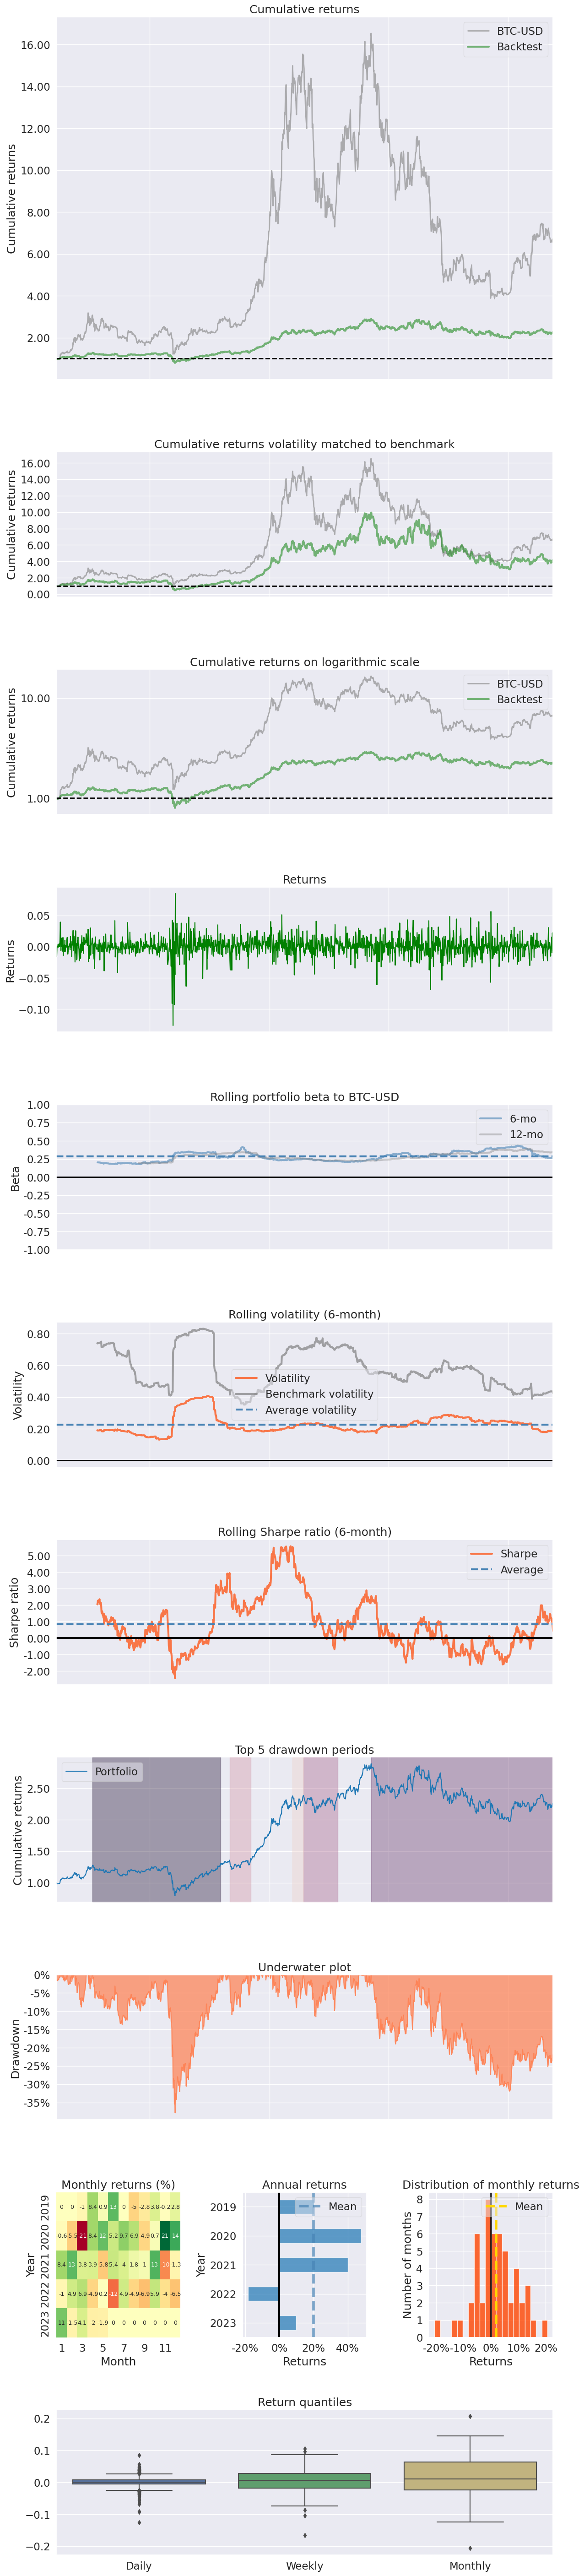

In [65]:
pf.create_returns_tear_sheet(port_rets, benchmark_rets=benchmark_rets)
